In [1298]:
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import os


In [1299]:
import seaborn as sns 
sns.set()

# suppress warnings (warnings do not prevent the code from executing)
import warnings
warnings.filterwarnings("ignore")

In [1300]:
#csv file location
covid = pd.read_csv(r'/Users/alexanderheinz/Downloads/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv')

In [1301]:
#info of file
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14126 entries, 0 to 14125
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        13173 non-null  float64
 1   age                       1349 non-null   object 
 2   sex                       1264 non-null   object 
 3   city                      10194 non-null  object 
 4   province                  12906 non-null  object 
 5   country                   13148 non-null  object 
 6   wuhan(0)_not_wuhan(1)     13170 non-null  float64
 7   latitude                  13147 non-null  float64
 8   longitude                 13147 non-null  float64
 9   geo_resolution            13147 non-null  object 
 10  date_onset_symptoms       746 non-null    object 
 11  date_admission_hospital   730 non-null    object 
 12  date_confirmation         13089 non-null  object 
 13  symptoms                  493 non-null    object 
 14  lives_

In [1302]:
#what does the dataframe look like?
covid.head(10)


,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1.0,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.646960,117.716600,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,47,male,"Baohe District, Hefei City",Anhui,China,1.0,31.778630,117.331900,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,49,male,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,47,female,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,50,female,"Feidong County, Hefei City",Anhui,China,1.0,32.001230,117.568100,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6.0,NaN,NaN,Lu'an City,Anhui,China,1.0,31.759410,116.315100,admin2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7.0,42,female,Fuyang City,Anhui,China,1.0,32.918800,115.703600,admin2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8.0,NaN,female,Huaibei City,Anhui,China,1.0,33.727220,116.742400,admin2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9.0,59,female,Huainan City,Anhui,China,1.0,32.757380,116.734000,admin2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10.0,30,male,Hefei City,Anhui,China,1.0,31.794440,117.342800,admin2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1303]:
#what are the columns
covid.columns

Index(['ID', 'age', 'sex', 'city', 'province', 'country',
       'wuhan(0)_not_wuhan(1)', 'latitude', 'longitude', 'geo_resolution',
       'date_onset_symptoms', 'date_admission_hospital', 'date_confirmation',
       'symptoms', 'lives_in_Wuhan', 'travel_history_dates',
       'travel_history_location', 'reported_market_exposure',
       'additional_information', 'chronic_disease_binary', 'chronic_disease',
       'source', 'sequence_available', 'outcome', 'date_death_or_discharge',
       'notes_for_discussion', 'location', 'admin3', 'admin2', 'admin1',
       'country_new', 'admin_id', 'data_moderator_initials', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44'],
      dtype='object')

In [1304]:
#count the NaN that is in the age column to make sure we have data
#to work with
count_nan = len(covid) - covid['age'].count()
count_nan

12777

In [1305]:
#Dropping the NaN in age. 14,126 - 12,777 = 1349 so below is correct
covid = covid.dropna(subset=['age'])
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1349 entries, 0 to 13171
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        1348 non-null   float64
 1   age                       1349 non-null   object 
 2   sex                       1186 non-null   object 
 3   city                      1163 non-null   object 
 4   province                  1203 non-null   object 
 5   country                   1328 non-null   object 
 6   wuhan(0)_not_wuhan(1)     1345 non-null   float64
 7   latitude                  1324 non-null   float64
 8   longitude                 1324 non-null   float64
 9   geo_resolution            1324 non-null   object 
 10  date_onset_symptoms       736 non-null    object 
 11  date_admission_hospital   709 non-null    object 
 12  date_confirmation         1340 non-null   object 
 13  symptoms                  475 non-null    object 
 14  lives_i

In [1306]:
#split the ranges in age to two rows. 

new = covid['age'].str.split('-', n=1, expand = True)
covid['filtered_age'] = new[0]

covid

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,...,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,filtered_age
0,1.0,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.646960,117.716600,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30
1,2.0,47,male,"Baohe District, Hefei City",Anhui,China,1.0,31.778630,117.331900,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47
2,3.0,49,male,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49
3,4.0,47,female,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47
4,5.0,50,female,"Feidong County, Hefei City",Anhui,China,1.0,32.001230,117.568100,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13167,13473.0,60-69,male,Sapporo City,Hokkaido,Japan,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60
13168,13474.0,50-59,male,NaN,Ishikawa,Japan,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50
13169,13475.0,60-69,male,Nagoya City,Aichi Prefecture,Japan,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60
13170,13476.0,40-49,female,NaN,Osaka,Japan,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40


In [1307]:
#get rid of values in age that do not make sense for that column
covid = covid[covid.age != '0.58333']

In [1308]:
covid = covid[covid.age != 'Belgium']

In [1309]:
covid = covid[covid.age != '0.08333']

In [1310]:
covid = covid[covid.age != '0.5']

In [1311]:
covid = covid[covid.age != '0.25']
covid = covid[covid.age != '1.75']

In [1312]:
#bring the filtered age back to the original 
#column age and covert the column from string to integer
covid['age'] = covid['filtered_age'].astype(str).astype(int)
#covid.head(50)

In [1313]:
#make new row age_group and put the ages on a range!
covid.loc[(covid['age'] < 10), 'age_group'] = '0-9'
covid.loc[(covid['age'] < 20) & (covid['age'] >= 10), 'age_group'] = '10-19'
covid.loc[(covid['age'] < 30) & (covid['age'] >= 20), 'age_group'] = '20-29'
covid.loc[(covid['age'] < 40) & (covid['age'] >= 30), 'age_group'] = '30-39'
covid.loc[(covid['age'] < 50) & (covid['age'] >= 40), 'age_group'] = '40-49'
covid.loc[(covid['age'] < 60) & (covid['age'] >= 50), 'age_group'] = '50-59'
covid.loc[(covid['age'] < 70) & (covid['age'] >= 60), 'age_group'] = '60-69'
covid.loc[(covid['age'] < 80) & (covid['age'] >= 70), 'age_group'] = '70-79'
covid.loc[(covid['age'] >= 80), 'age_group'] = '80+'
covid.head(10)

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,...,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,filtered_age,age_group
0,1.0,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.646960,117.716600,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,30-39
1,2.0,47,male,"Baohe District, Hefei City",Anhui,China,1.0,31.778630,117.331900,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47,40-49
2,3.0,49,male,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49,40-49
3,4.0,47,female,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47,40-49
4,5.0,50,female,"Feidong County, Hefei City",Anhui,China,1.0,32.001230,117.568100,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,50-59
6,7.0,42,female,Fuyang City,Anhui,China,1.0,32.918800,115.703600,admin2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42,40-49
8,9.0,59,female,Huainan City,Anhui,China,1.0,32.757380,116.734000,admin2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59,50-59
9,10.0,30,male,Hefei City,Anhui,China,1.0,31.794440,117.342800,admin2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,30-39
11,12.0,39,male,Fuyang City,Anhui,China,1.0,32.918800,115.703600,admin2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39,30-39
13,14.0,38,female,Chizhou City,Anhui,China,1.0,30.285250,117.365800,admin2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38,30-39


In [1314]:
#View less columns.
covid = covid[['ID','age', 'age_group','sex','city','province','country','date_confirmation','symptoms','outcome']]
covid

,ID,age,age_group,sex,city,province,country,date_confirmation,symptoms,outcome
0,1.0,30,30-39,male,"Chaohu City, Hefei City",Anhui,China,22.01.2020,NaN,NaN
1,2.0,47,40-49,male,"Baohe District, Hefei City",Anhui,China,23.01.2020,NaN,NaN
2,3.0,49,40-49,male,"High-Tech Zone, Hefei City",Anhui,China,23.01.2020,NaN,NaN
3,4.0,47,40-49,female,"High-Tech Zone, Hefei City",Anhui,China,23.01.2020,NaN,NaN
4,5.0,50,50-59,female,"Feidong County, Hefei City",Anhui,China,23.01.2020,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
13167,13473.0,60,60-69,male,Sapporo City,Hokkaido,Japan,28.02.2020,fever,NaN
13168,13474.0,50,50-59,male,NaN,Ishikawa,Japan,28.02.2020,NaN,NaN
13169,13475.0,60,60-69,male,Nagoya City,Aichi Prefecture,Japan,28.02.2020,fever (38 ° C),NaN
13170,13476.0,40,40-49,female,NaN,Osaka,Japan,28.02.2020,fever (38 ° C),NaN


In [1315]:
#Group the multiple sex variables into a common variable
covid = covid.replace('male', 'Male')
covid = covid.replace('female', 'Female')
covid

,ID,age,age_group,sex,city,province,country,date_confirmation,symptoms,outcome
0,1.0,30,30-39,Male,"Chaohu City, Hefei City",Anhui,China,22.01.2020,NaN,NaN
1,2.0,47,40-49,Male,"Baohe District, Hefei City",Anhui,China,23.01.2020,NaN,NaN
2,3.0,49,40-49,Male,"High-Tech Zone, Hefei City",Anhui,China,23.01.2020,NaN,NaN
3,4.0,47,40-49,Female,"High-Tech Zone, Hefei City",Anhui,China,23.01.2020,NaN,NaN
4,5.0,50,50-59,Female,"Feidong County, Hefei City",Anhui,China,23.01.2020,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
13167,13473.0,60,60-69,Male,Sapporo City,Hokkaido,Japan,28.02.2020,fever,NaN
13168,13474.0,50,50-59,Male,NaN,Ishikawa,Japan,28.02.2020,NaN,NaN
13169,13475.0,60,60-69,Male,Nagoya City,Aichi Prefecture,Japan,28.02.2020,fever (38 ° C),NaN
13170,13476.0,40,40-49,Female,NaN,Osaka,Japan,28.02.2020,fever (38 ° C),NaN


In [1316]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

In [1317]:
import re
from pandas import DataFrame

In [1318]:
#how many Male and Female patients do we have
sex_count = covid.pivot_table(index=['sex'], aggfunc='size')
print(sex_count)

sex
Female    505
Male      676
dtype: int64


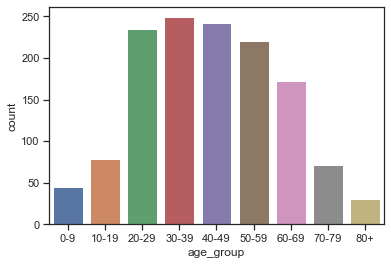

In [1319]:
#plot age groups with count for each
#rearrange x axis
sns.countplot(x="age_group", order = ['0-9', 
'10-19', '20-29', '30-39', '40-49', '50-59', '60-69',
'70-79', '80+'], data=covid)

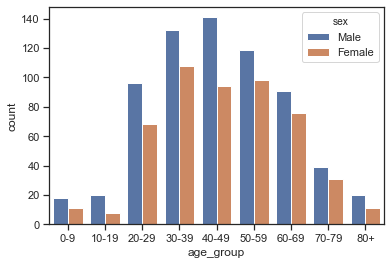

In [1320]:
#plot age groups AND sex with count for each
#rearrange x axis
sns.countplot(x="age_group", hue="sex", order = ['0-9', 
'10-19', '20-29', '30-39', '40-49', '50-59', '60-69',
'70-79', '80+'], data=covid)

In [1321]:
#split up sex dataset
male = covid[(covid['sex'] == 'Male')]
male.info()

female = covid[(covid['sex'] == 'Female')]
female.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 676 entries, 0 to 13169
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 676 non-null    float64
 1   age                676 non-null    int64  
 2   age_group          676 non-null    object 
 3   sex                676 non-null    object 
 4   city               570 non-null    object 
 5   province           594 non-null    object 
 6   country            666 non-null    object 
 7   date_confirmation  671 non-null    object 
 8   symptoms           273 non-null    object 
 9   outcome            64 non-null     object 
dtypes: float64(1), int64(1), object(8)
memory usage: 58.1+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 505 entries, 3 to 13171
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 505 non-null    float64
 1 

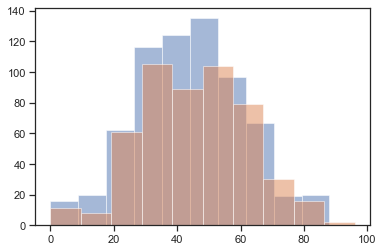

In [1322]:
#Does the virus interact differently with sex?
plt.hist(male['age'], alpha = .5)
plt.hist(female['age'], alpha = .5)
plt.show()

In [1323]:
# let's look at skewness and kurtosis
# -8 - 8 kurt range
# -20 -20 skew range
print(stats.describe(male['age']))
print(stats.describe(female['age']))

DescribeResult(nobs=676, minmax=(0, 88), mean=44.20414201183432, variance=297.82196800350647, skewness=-0.004162925491621215, kurtosis=-0.22986336765602955)
DescribeResult(nobs=505, minmax=(0, 96), mean=45.14059405940594, variance=293.02979726544083, skewness=0.01110533588160514, kurtosis=-0.22359356395209318)


In [1324]:
#tstat > 1.96 p value < 0.05
stats.ttest_ind(male['age'], female['age'])

Ttest_indResult(statistic=-0.9257635347768195, pvalue=0.3547583323641539)

In [ ]:
# Since the p-value is larger than 0.05, we cannot conclude that 
# significant difference exists between sex and age affected with COVID 19.


In [1325]:
#lets look at the confidence interval
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(male['age'], female['age'])

#Age is very similar in affected patients when it comes to sex.

'The difference in means at the 95% confidence interval (two-tail) is between -1.0438484467080325 and 2.9167525418512734.'

[[Text(0, 0, 'male'), Text(0, 0, 'female')]]

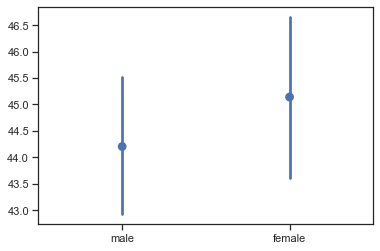

In [1326]:
#pointplot for sex and age
#Affected males are a little younger than females
g = sns.pointplot(data=[male['age'],
                        female['age']], join=False)
                        
g.set(xticklabels = ['male', 'female'])

In [ ]:
# Since there are more males than females in the general population
#of the world, this could be the reason that more males are affected 
#by COVID19.

#Also, there are more male smokers than female smokers and this could 
#also play into consideration. 

#there isn't much difference, but what difference there is, the above
#could be into play.

#I don't think there is any bias influencing this analysis. I wish
#there was more data regarding the affected, but it might be too
#early at this point to get the full data that would really help
#this test.

#It is said that the older ages are more affected, but this shows 
#otherwise.

#If I could collect new data, and I will once it comes out,
#the mortality rate and how that affects the sex/age group.

#other variables would be symptoms/days in hospital/underlying conditions
#I'm very excited to test this once all the data comes out!

